# ***UNEMPLOYMENT ANALYSIS WITH PYTHON***

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print(f"The number of Rows : {df.shape[0]}\nThe number of columns : {df.shape[1]}")

The number of Rows : 768
The number of columns : 7


In [5]:
new_columns = list(df.columns)
new_columns = [col.strip() for col in new_columns]
df.columns = new_columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.dropna(inplace = True)

In [8]:
df.tail(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [9]:
df.value_counts('Region')

Region
Andhra Pradesh      28
Karnataka           28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Maharashtra         28
Kerala              28
Madhya Pradesh      28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
West Bengal         28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

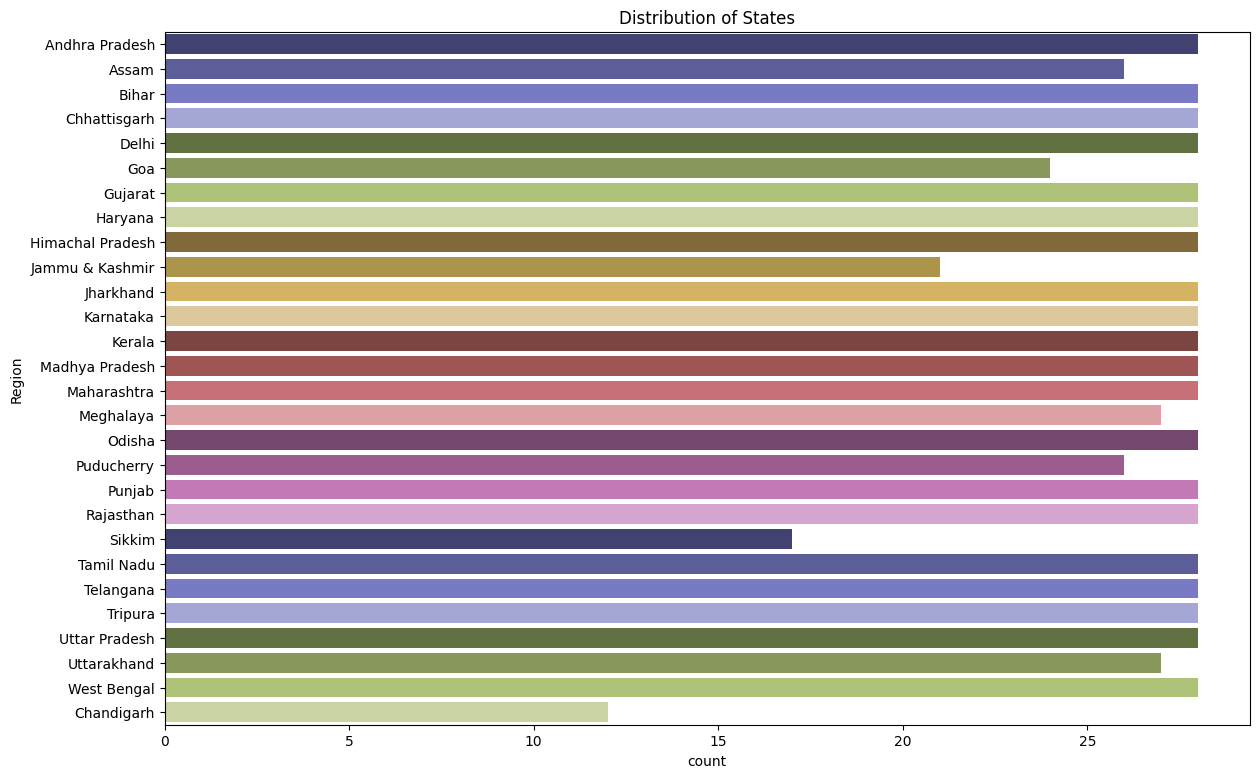

In [10]:
plt.figure(figsize = (14,9))
sns.countplot(y = df['Region'], palette = 'tab20b')
plt.title('Distribution of States');

In [11]:
df['Region'].nunique()

28

In [12]:
df.value_counts('Area')

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [14]:
df['Frequency'] = df['Frequency'].replace(' Monthly','Monthly')

In [15]:
df.value_counts('Frequency')

Frequency
Monthly    740
Name: count, dtype: int64

In [16]:
df.drop('Frequency', axis = 1, inplace = True)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['MM YYYY'] = df['Date'].dt.strftime('%m-%Y')

In [18]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,MM YYYY
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019,05-2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019,06-2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019,07-2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019,08-2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019,09-2019


# **Exploratory Data Analysis**

In [19]:
rural = df[df.Area == 'Rural']
urban = df[df.Area == 'Urban']

In [20]:
rural.pivot_table(index = 'MM YYYY', values = 'Estimated Unemployment Rate (%)', aggfunc = np.mean)

,Estimated Unemployment Rate (%)
MM YYYY,
01-2020,7.842692
02-2020,8.752308
03-2020,9.683333
04-2020,21.746000
05-2019,7.068077
05-2020,21.210800
06-2019,8.201154
06-2020,11.825200
07-2019,7.741923


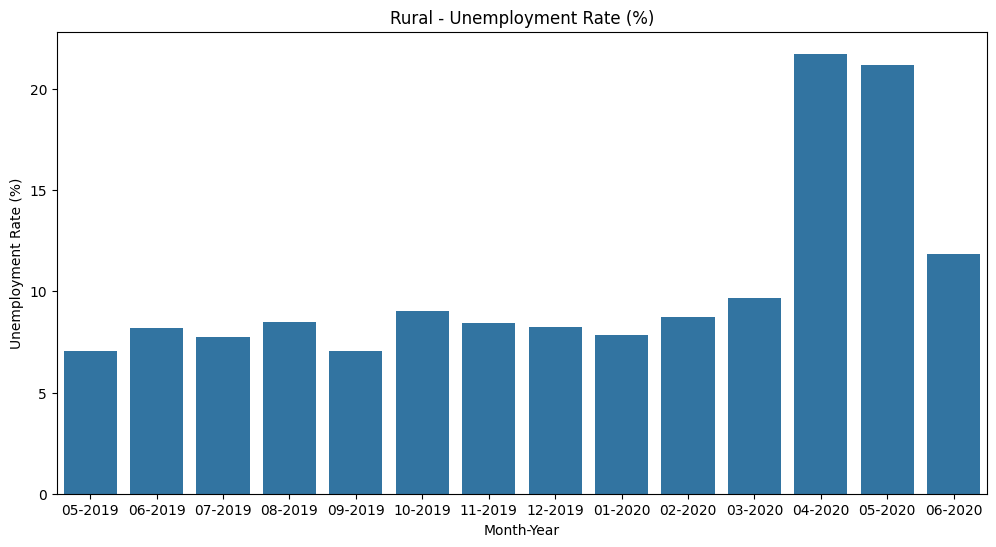

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Rural - Unemployment Rate (%)");

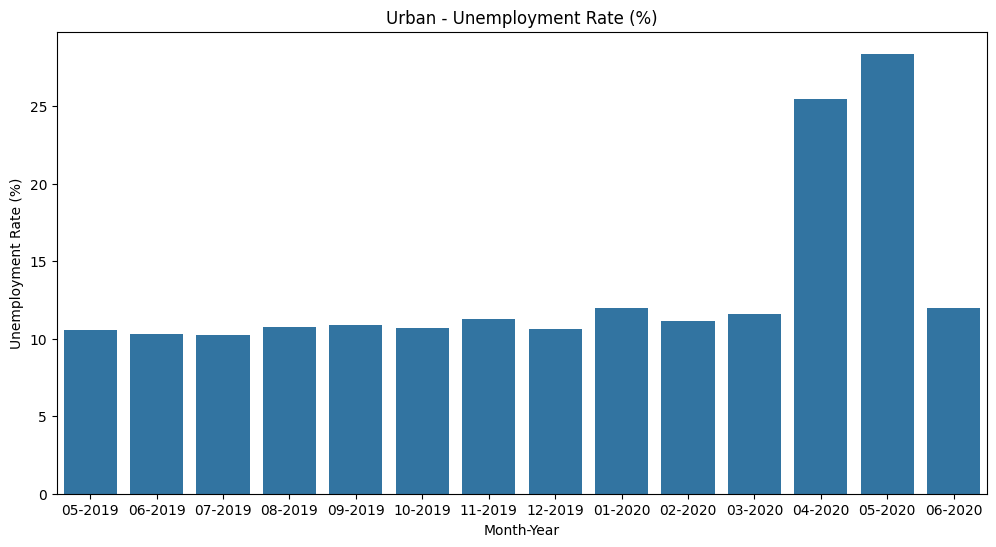

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = urban, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Urban - Unemployment Rate (%)");

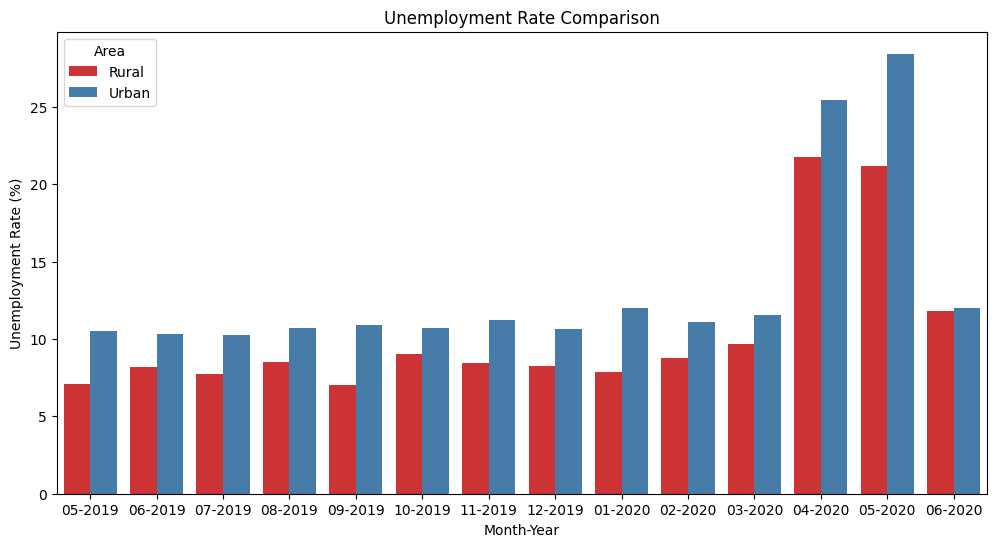

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = df,
            hue = 'Area', errorbar=('ci', 0), palette = 'Set1')
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison");

In [24]:
urban['Region'].nunique()

28

In [25]:
rural['Region'].nunique()

27

In [26]:
set(urban['Region'].unique()) - set(rural['Region'].unique())

{'Chandigarh'}

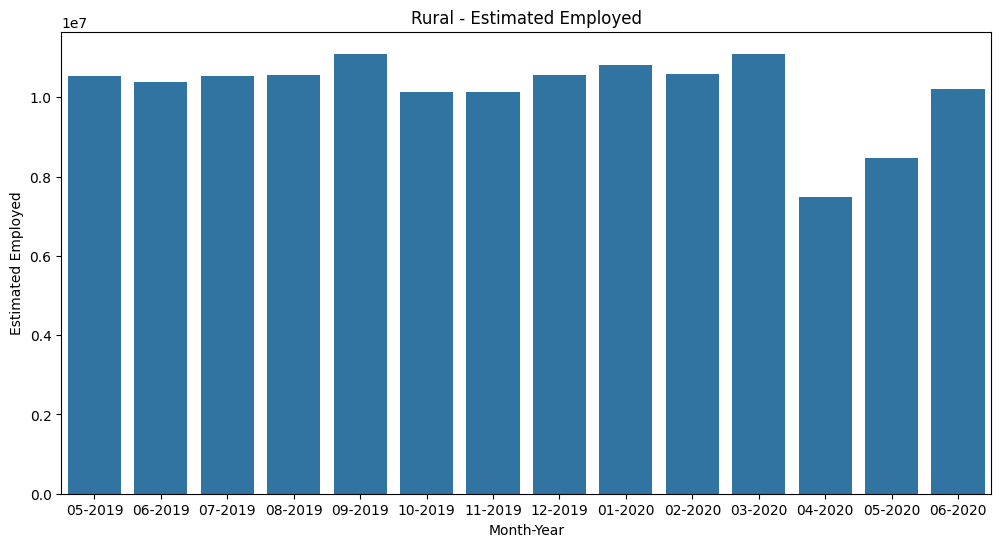

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Rural - Estimated Employed");

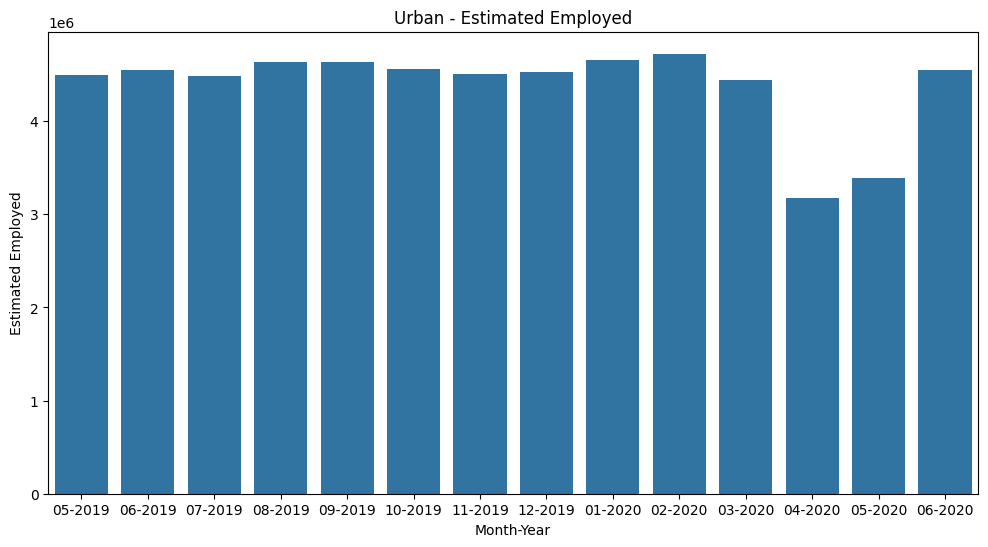

In [28]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = urban,errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Urban - Estimated Employed");

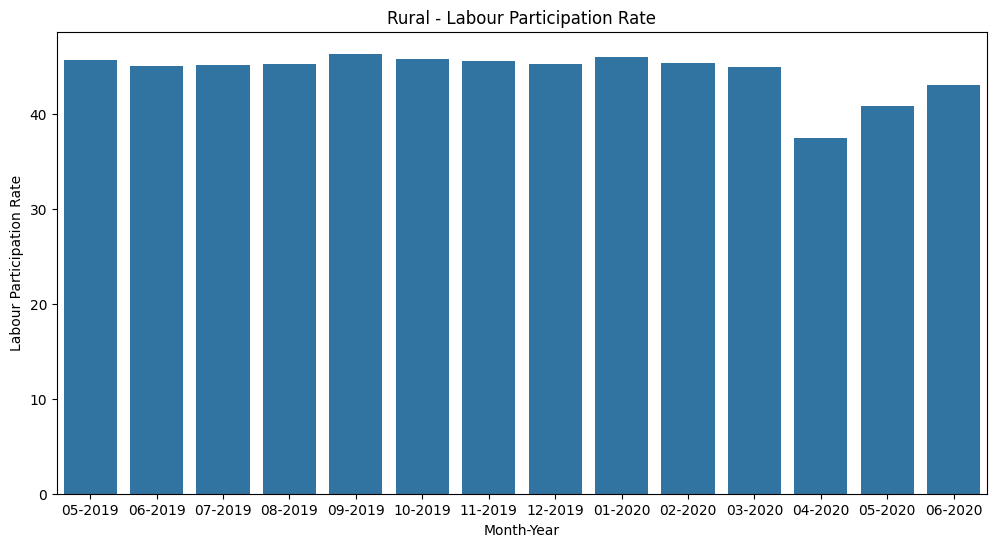

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate')
plt.title("Rural - Labour Participation Rate");

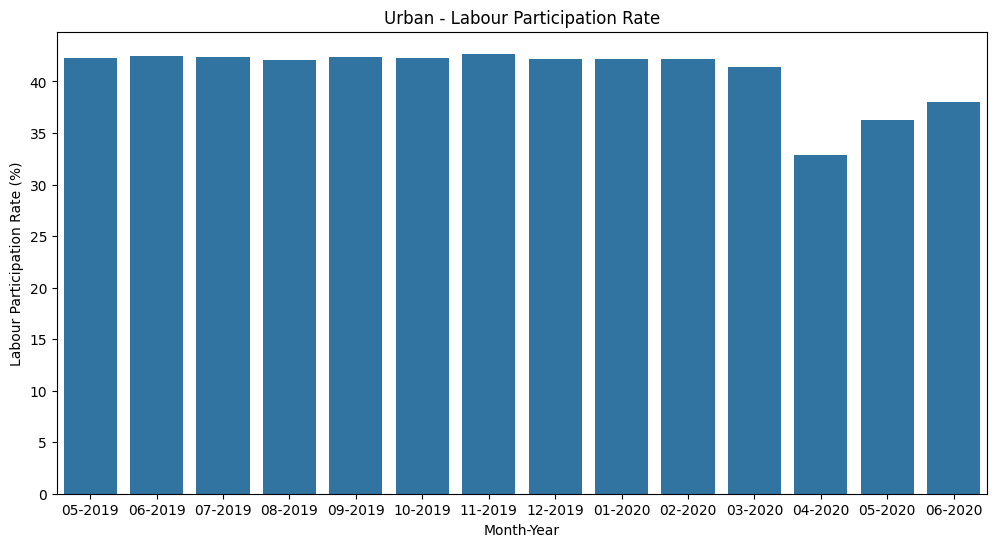

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = urban,errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Urban - Labour Participation Rate");

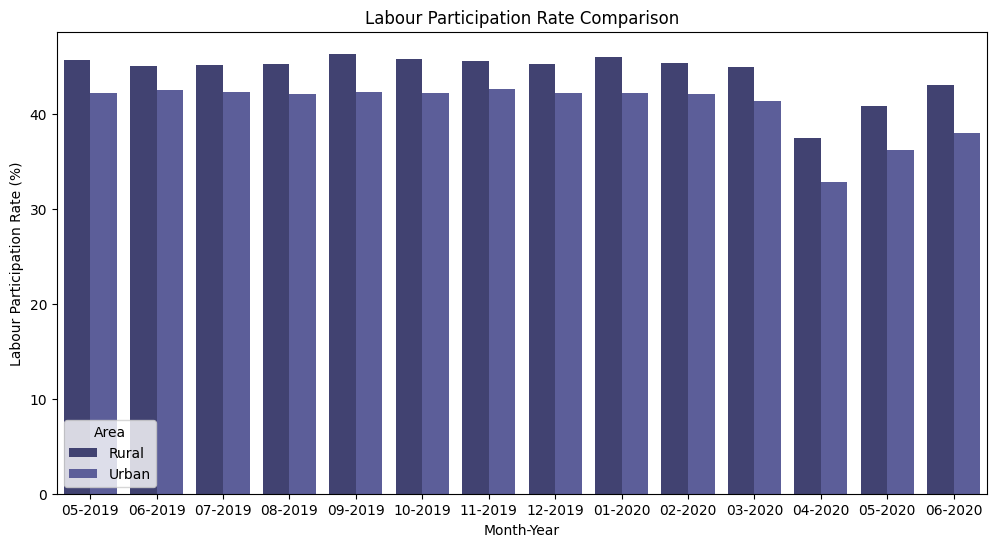

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = df,
            hue = 'Area', errorbar=('ci', 0), palette = 'tab20b')
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison");

# **Mapping Zones**

In [32]:
central = ["Chhattisgarh","Madhya Pradesh","Uttar Pradesh","Uttarakhand"]
eastern = ["Bihar", "Jharkhand", 'Odisha' ,'West Bengal']
northeast = ["Arunachal Pradesh" ,"Assam","Meghalaya", "Mizoram", "Nagaland", "Manipur", "Sikkim", "Tripura"]
northern = ["Haryana", "Chandigarh","Delhi","Himachal Pradesh", "Jammu & Kashmir", "Punjab", "Rajasthan"]
southern = [ "Andhra Pradesh", "Karnataka","Puducherry" ,"Kerala","Tamil Nadu", "Telangana"]
western = ['Goa', 'Gujarat', 'Maharashtra']

In [33]:
def zone_map(state):
    if state in central:
        return 'Central'
    elif state in eastern:
        return 'Eastern'
    elif state in northeast:
        return 'North-Eastern'
    elif state in northern:
        return 'Northern'
    elif state in southern:
        return 'Southern'
    elif state in western:
        return 'Western'

In [34]:
df['Zone'] = df['Region'].apply(lambda x : zone_map(x))

In [35]:
df.value_counts('Zone')

Zone
Northern         173
Southern         166
Eastern          112
Central          111
North-Eastern     98
Western           80
Name: count, dtype: int64

In [36]:
zones = list(df['Zone'].unique())
zones

['Southern', 'North-Eastern', 'Eastern', 'Central', 'Northern', 'Western']

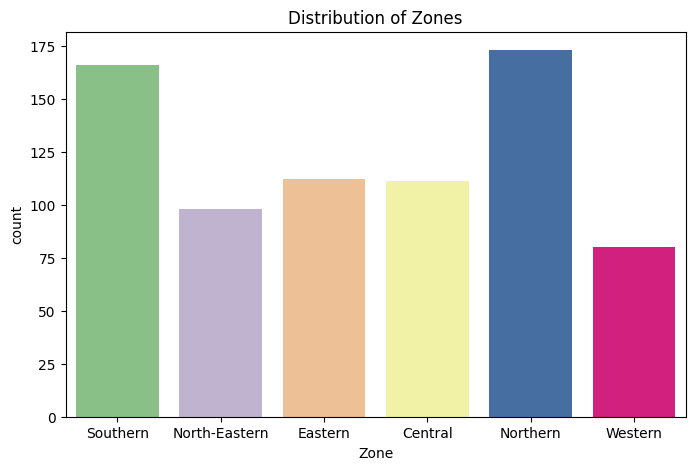

In [37]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['Zone'], palette = 'Accent')
plt.title('Distribution of Zones');

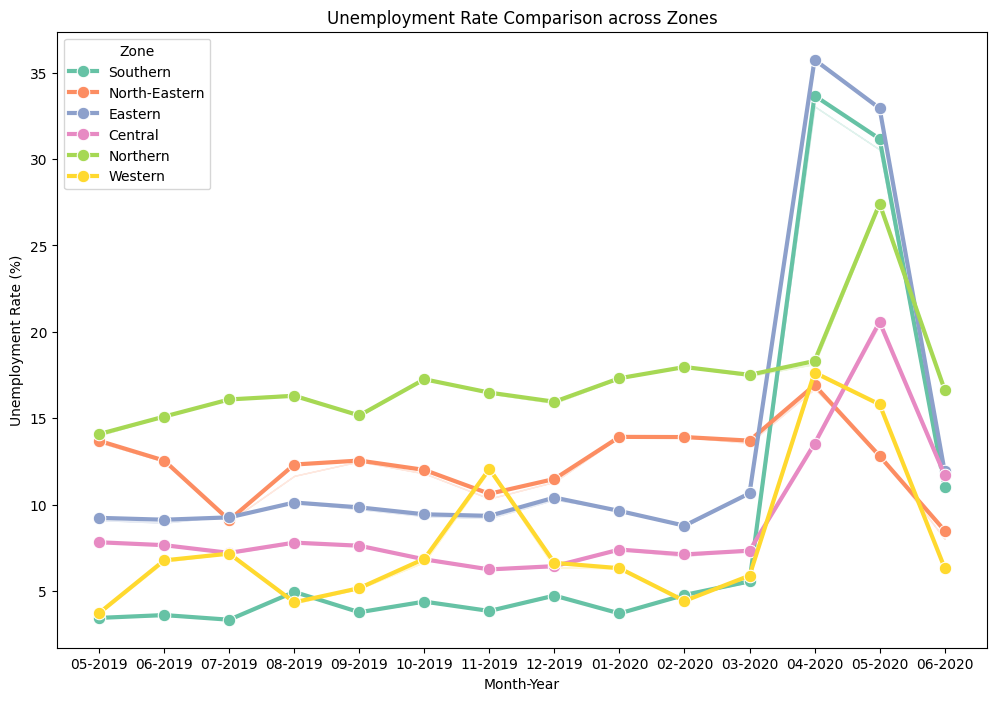

In [38]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = df,
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison across Zones");

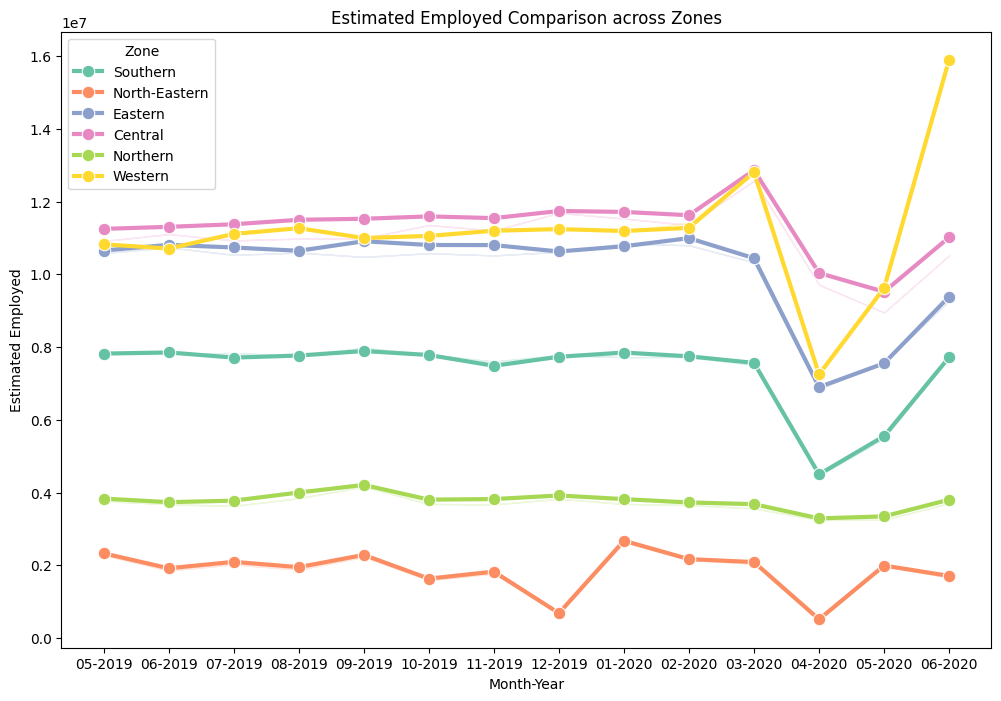

In [39]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Employed', data = df,
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Estimated Employed Comparison across Zones");

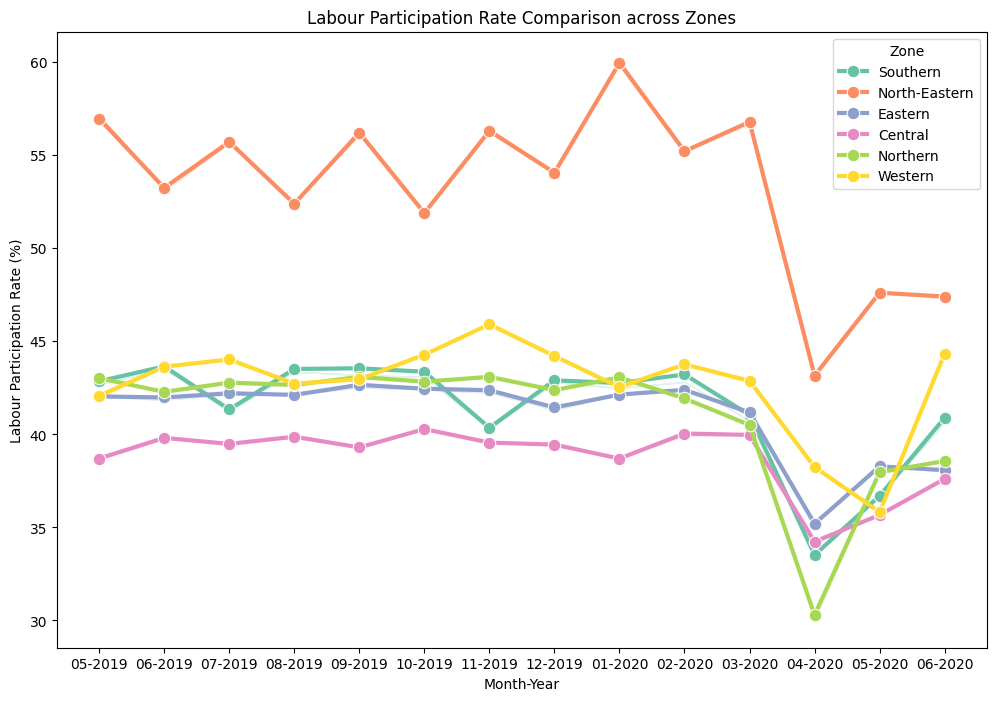

In [40]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = df,
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison across Zones");

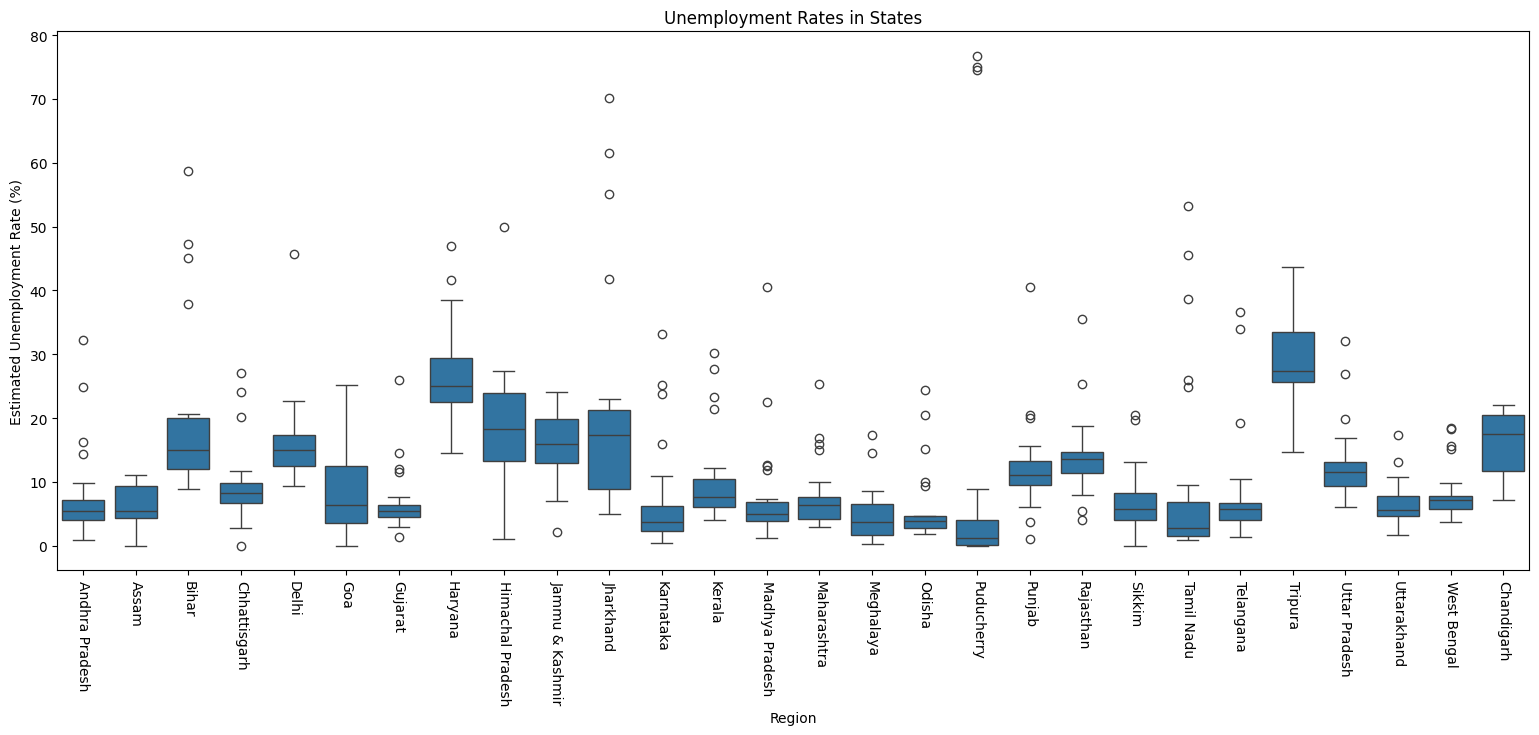

In [41]:
plt.figure(figsize=(19, 7))

sns.boxplot(df, x = 'Region', y = 'Estimated Unemployment Rate (%)')
plt.xticks(rotation = -90)
plt.title("Unemployment Rates in States");

Unemployment Rates is higher in :

1.   Tripura
2.   Haryana
3.   Chandigarh
4.   Bihar
5.   Himachal Pradesh

# **SOUTHERN REGION**

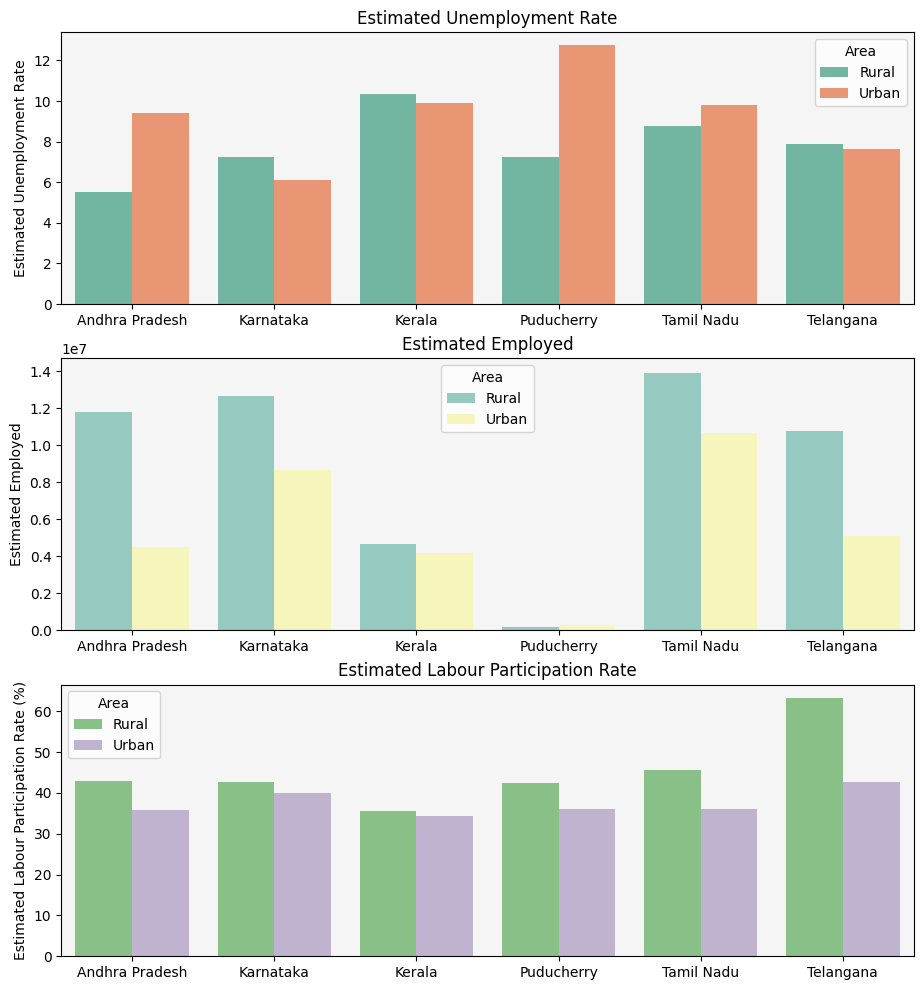

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(11, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[0]}')],
            hue = 'Area',ax=axes[0], palette='Set2',  errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[0]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[0]}')],
            hue = 'Area',ax=axes[2], palette='Accent',errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

# **NORTHEASTERN REGION**

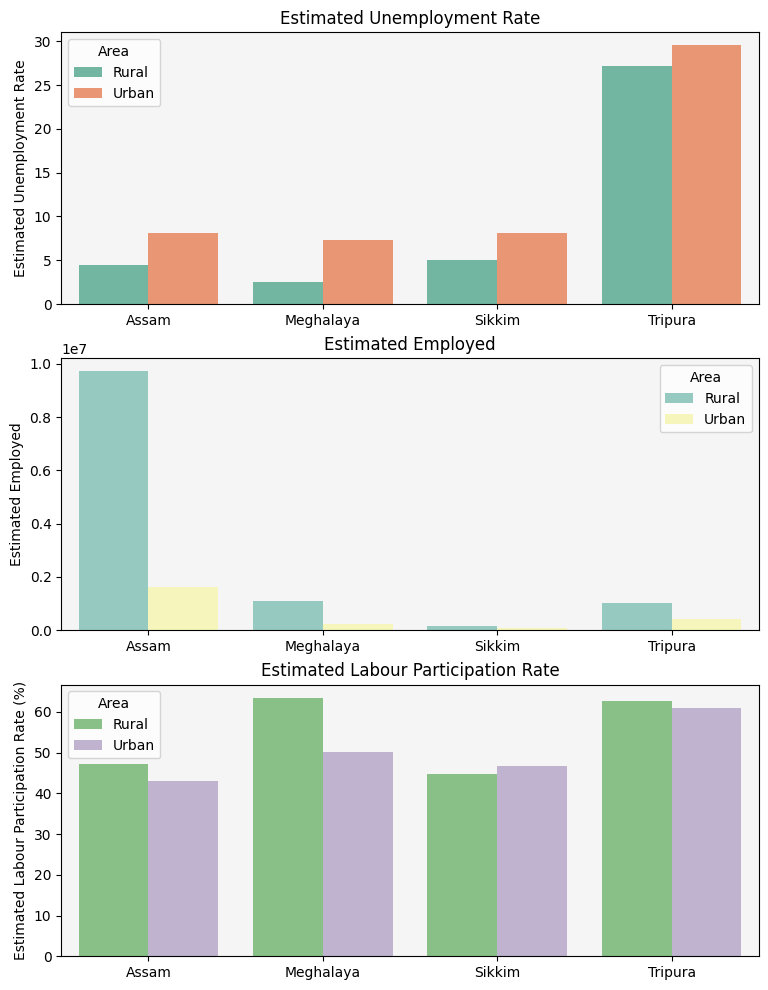

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(9, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[1]}')],
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[1]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[1]}')],
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

# **EASTERN REGION**

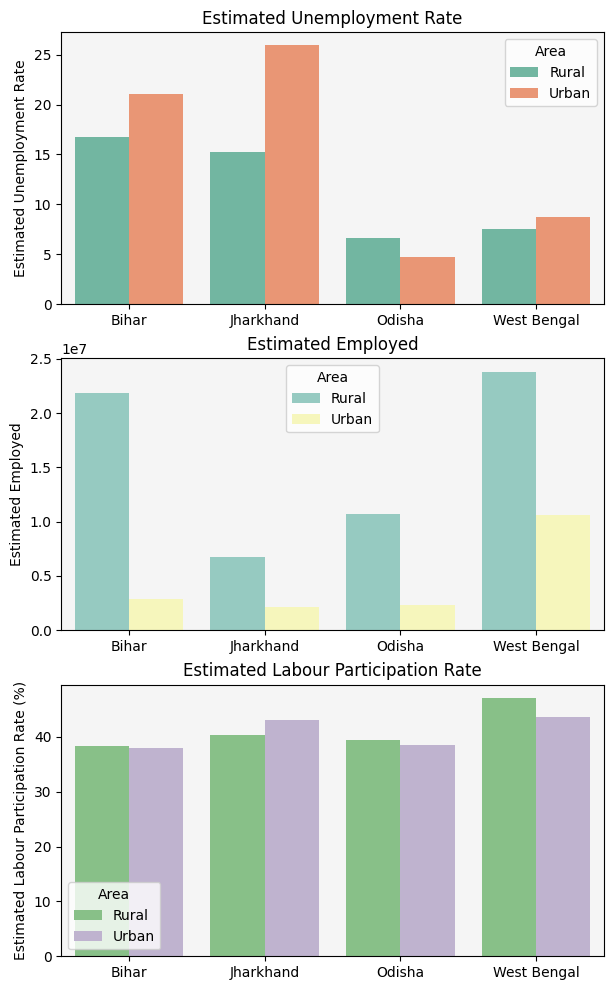

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[2]}')],
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[2]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[2]}')],
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

# **CENTRAL REGION**

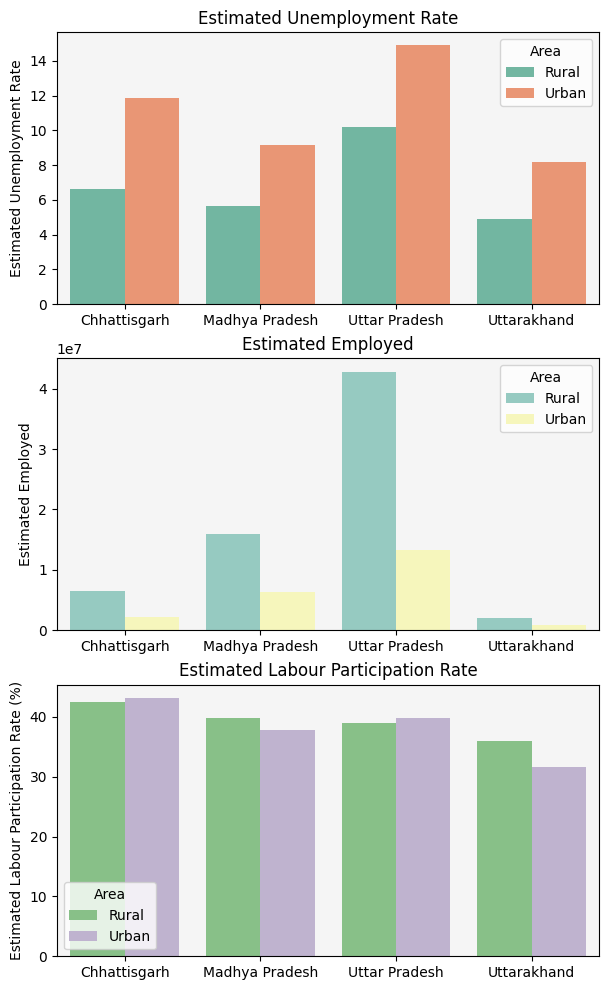

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[3]}')],
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[3]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[3]}')],
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

# **NORTHERN REGION**

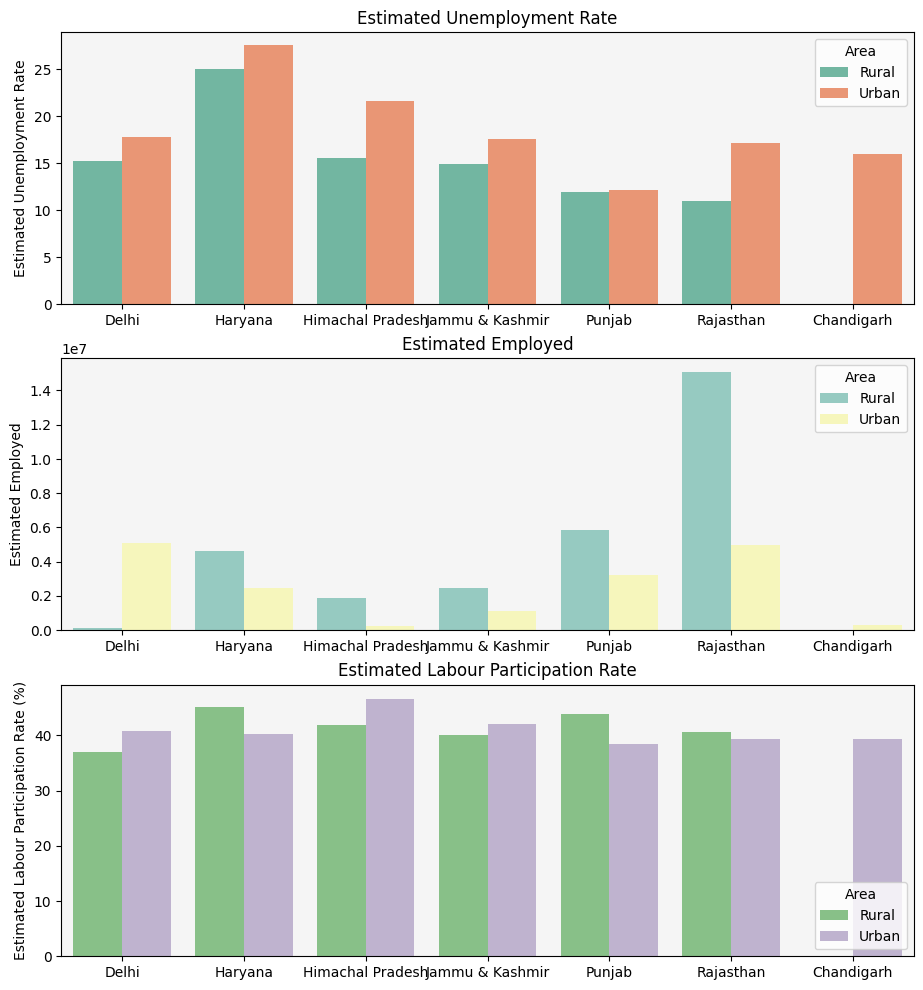

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(11, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[4]}')],
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[4]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[4]}')],
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

# **WESTERN REGION**

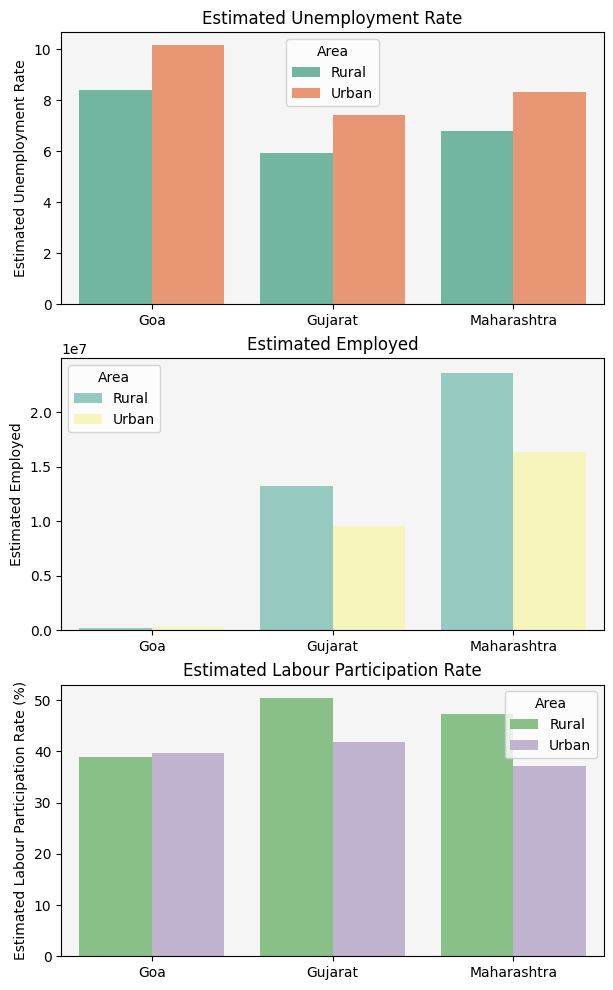

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[5]}')],
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[5]}')],
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[5]}')],
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

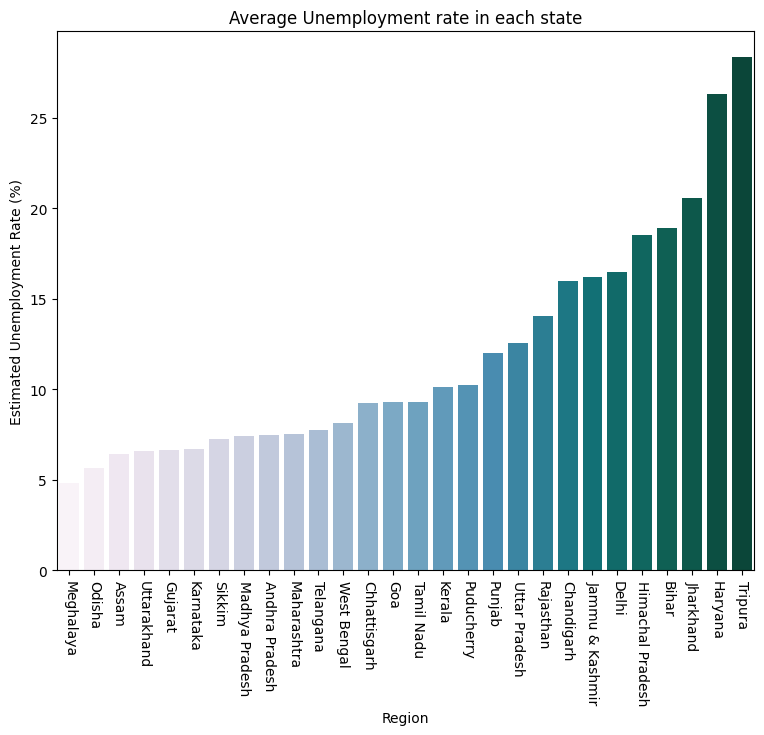

In [48]:
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

plt.figure(figsize = (9,7))
sns.barplot(df_unemployed, x ='Region', y ='Estimated Unemployment Rate (%)', palette = 'PuBuGn')
plt.xticks(rotation = -90)
plt.title('Average Unemployment rate in each state');

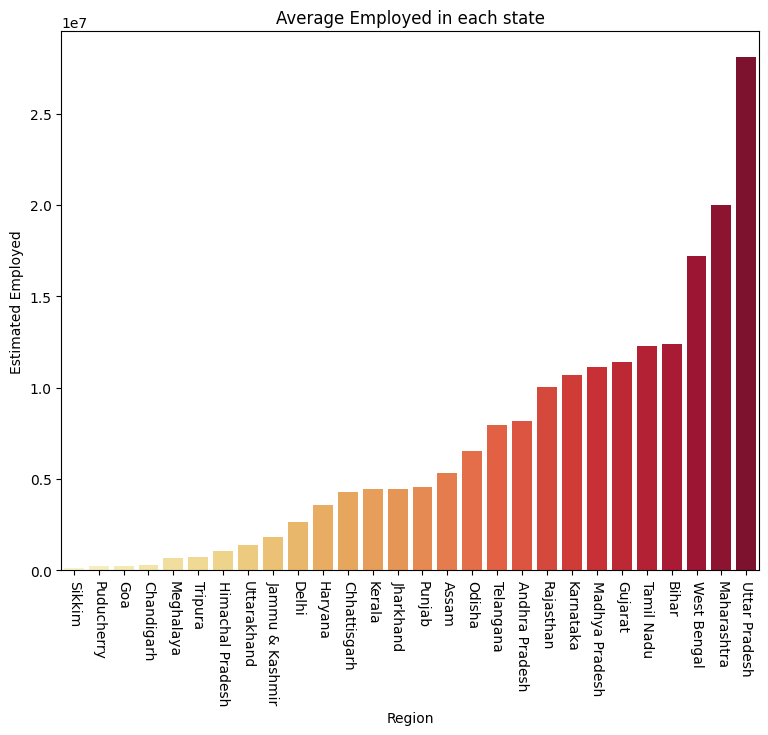

In [49]:
plot_emp = df[['Estimated Employed','Region']]
df_employed = plot_emp.groupby('Region').mean().reset_index()

df_employed = df_employed.sort_values('Estimated Employed')

plt.figure(figsize = (9,7))
sns.barplot(df_employed, x ='Region',y ='Estimated Employed', palette = 'YlOrRd')
plt.xticks(rotation = -90)
plt.title('Average Employed in each state');